# Bagging and Bootstrapping Regression

Purpose: Develop models to predict car price from dataset.

Author: Jordan A. Caraballo-Vega

Version: 2024.04.03

In [1]:
import random
import statistics
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import mode
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2. Load Dataset

In [3]:
cars_df = pd.read_csv('drive/MyDrive/Terminal34/CarsData.csv')
cars_df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
0,I10,2017,7495,Manual,11630,Petrol,145,60.1,1.0,hyundi
1,Polo,2017,10989,Manual,9200,Petrol,145,58.9,1.0,volkswagen
2,2 Series,2019,27990,Semi-Auto,1614,Diesel,145,49.6,2.0,BMW
3,Yeti Outdoor,2017,12495,Manual,30960,Diesel,150,62.8,2.0,skoda
4,Fiesta,2017,7999,Manual,19353,Petrol,125,54.3,1.2,ford
...,...,...,...,...,...,...,...,...,...,...
97707,Fiesta,2017,10447,Automatic,8337,Petrol,145,54.3,1.0,ford
97708,3 Series,2014,14995,Manual,25372,Diesel,30,61.4,2.0,BMW
97709,Fiesta,2017,8950,Manual,19910,Petrol,125,54.3,1.2,ford
97710,Astra,2017,10700,Automatic,24468,Petrol,125,50.4,1.4,vauxhall


## 3. Perform EDA

In [4]:
cars_df['transmission'].unique()

array(['Manual', 'Semi-Auto', 'Automatic', 'Other'], dtype=object)

In [5]:
cars_df.describe()

,year,price,mileage,tax,mpg,engineSize
count,97712.000000,97712.000000,97712.000000,97712.000000,97712.000000,97712.000000
mean,2017.066502,16773.487555,23219.475499,120.142408,55.205623,1.664913
std,2.118661,9868.552222,21060.882301,63.357250,16.181659,0.558574
min,1970.000000,450.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,9999.000000,7673.000000,125.000000,47.100000,1.200000
50%,2017.000000,14470.000000,17682.500000,145.000000,54.300000,1.600000
75%,2019.000000,20750.000000,32500.000000,145.000000,62.800000,2.000000
max,2024.000000,159999.000000,323000.000000,580.000000,470.800000,6.600000


<Axes: xlabel='transmission', ylabel='count'>

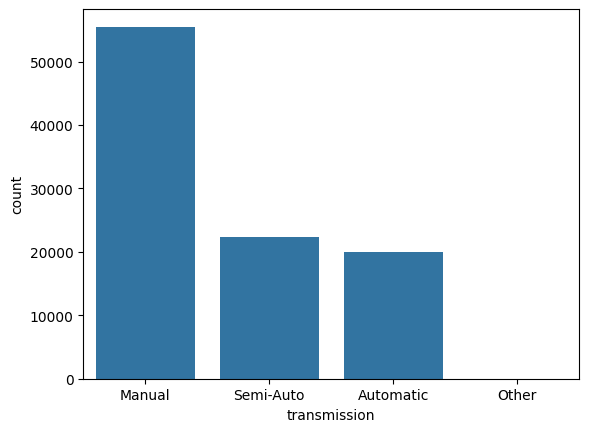

In [6]:
sns.countplot(data=cars_df, x='transmission')

<Axes: xlabel='price', ylabel='Count'>

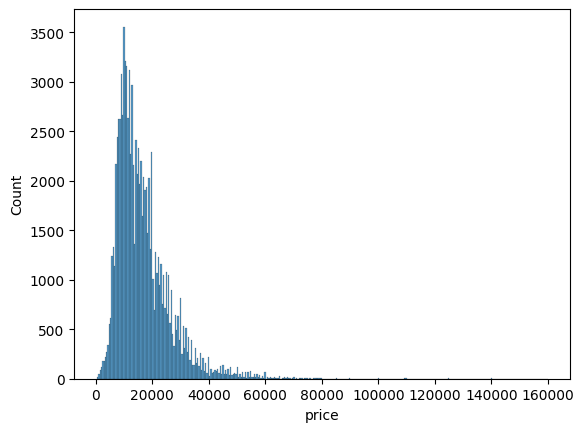

In [7]:
sns.histplot(data=cars_df, x='price')

<Axes: xlabel='mileage', ylabel='Count'>

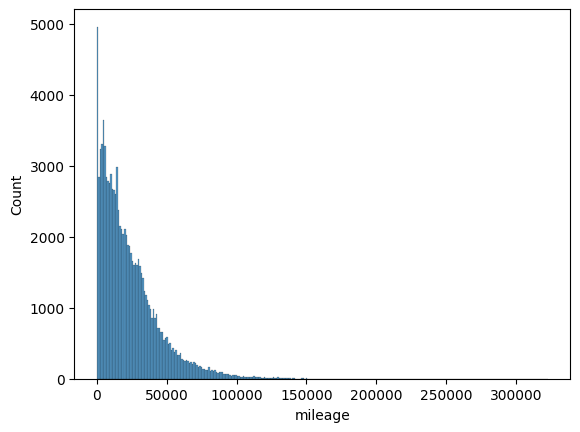

In [8]:
sns.histplot(data=cars_df, x='mileage')

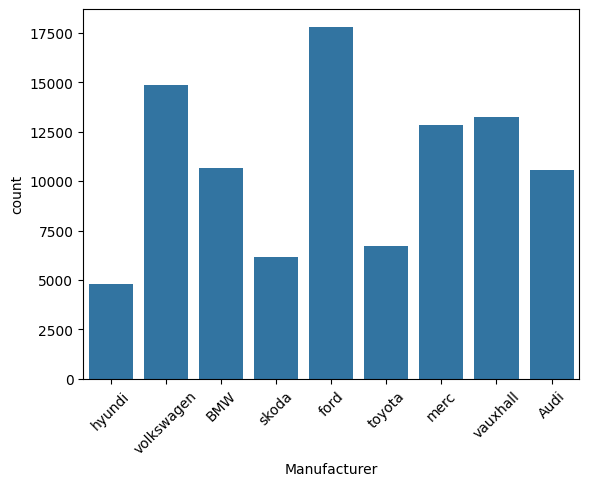

In [9]:
sns.countplot(data=cars_df, x='Manufacturer')
plt.xticks(rotation=45)
plt.show()

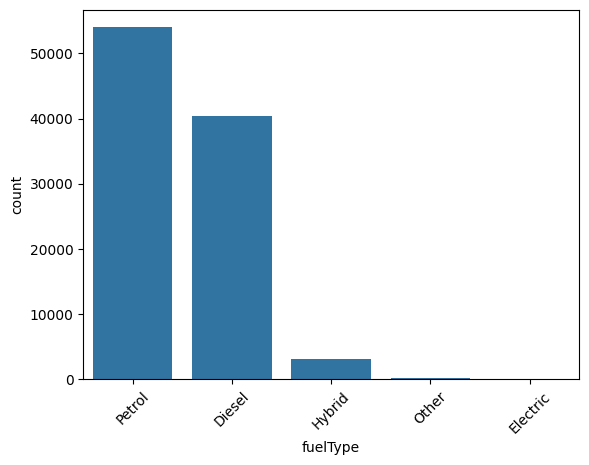

In [43]:
sns.countplot(data=cars_df, x='fuelType')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='price', ylabel='mileage'>

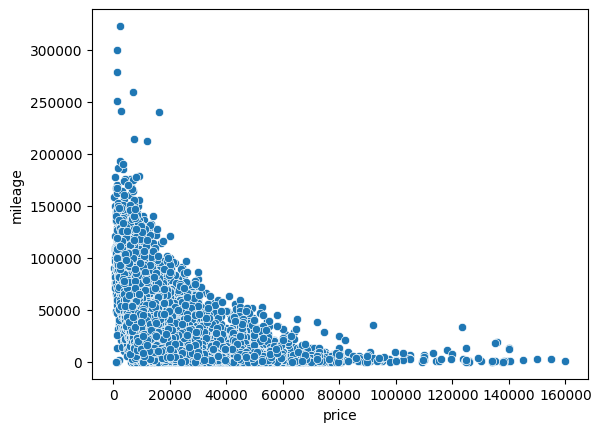

In [10]:
sns.scatterplot(data=cars_df, x='price', y='mileage')

<Axes: xlabel='price', ylabel='tax'>

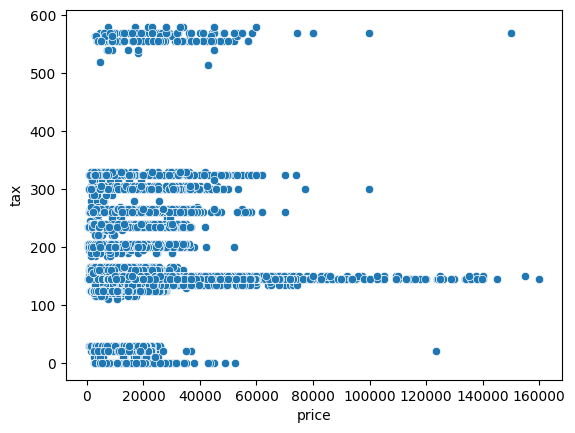

In [11]:
sns.scatterplot(data=cars_df, x='price', y='tax')

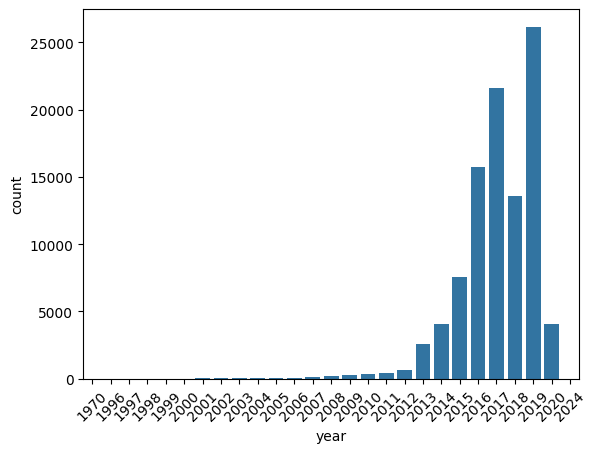

In [12]:
sns.countplot(data=cars_df, x='year')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='mpg', ylabel='Count'>

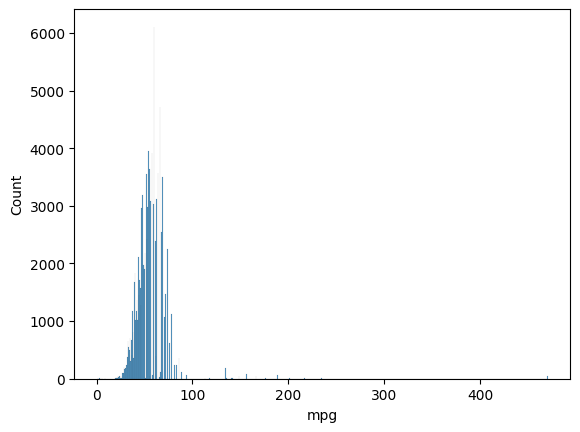

In [42]:
sns.histplot(data=cars_df, x='mpg')

## 4. Feature Engineering

Considerations to work on here. For the initial experiments, just gather the dataset.

In [13]:
X = cars_df.drop(['price'], axis=1)
y = cars_df['price']

In [14]:
X.head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
0,I10,2017,Manual,11630,Petrol,145,60.1,1.0,hyundi
1,Polo,2017,Manual,9200,Petrol,145,58.9,1.0,volkswagen
2,2 Series,2019,Semi-Auto,1614,Diesel,145,49.6,2.0,BMW
3,Yeti Outdoor,2017,Manual,30960,Diesel,150,62.8,2.0,skoda
4,Fiesta,2017,Manual,19353,Petrol,125,54.3,1.2,ford


In [15]:
X['model'].unique()

array([' I10', ' Polo', ' 2 Series', ' Yeti Outdoor', ' Fiesta', ' C-HR',
       ' Kuga', ' Tiguan', ' A Class', ' 1 Series', ' Up', ' Golf',
       ' Corsa', ' RAV4', ' GLA Class', ' Aygo', ' Q5', ' Karoq',
       ' Scala', ' Auris', ' Tucson', ' A4', ' Viva', ' Kodiaq',
       ' C Class', ' Mondeo', ' Citigo', ' Yaris', ' X4', ' Octavia',
       ' Astra', ' Focus', ' 3 Series', ' GLC Class', ' Q3', ' B-MAX',
       ' C-MAX', ' IX20', ' X5', ' T-Cross', ' Shuttle', ' Insignia',
       ' Zafira', ' A3', ' A5', ' SL CLASS', ' EcoSport', ' X1', ' Fabia',
       ' Golf SV', ' Verso', ' Yeti', ' Mokka X', ' Antara', ' E Class',
       ' 4 Series', ' Superb', ' 5 Series', ' 8 Series', ' B Class',
       ' Ka+', ' X2', ' GLE Class', ' A6', ' Mokka', ' Passat', ' Kamiq',
       ' Adam', ' Q7', ' Tiguan Allspace', ' X3', ' A1', ' Grandland X',
       ' Meriva', ' Tourneo Connect', ' Arteon', ' TT', ' GLS Class',
       ' Santa Fe', ' I30', ' S Class', ' Ioniq', ' Edge', ' S-MAX',
       ' SLK'

## 5. Split Dataset

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.20, random_state=42)
X_train.shape, X_test.shape

((78169, 9), (19543, 9))

## 6. Initialize and train simple model

In [17]:
"""
---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
<ipython-input-26-46c5d2f6ee64> in <cell line: 2>()
      1 model = RandomForestRegressor(n_estimators=100) #LinearRegression()
----> 2 model.fit(X_train, y_train)

5 frames
/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py in __array__(self, dtype)
   1996     def __array__(self, dtype: npt.DTypeLike | None = None) -> np.ndarray:
   1997         values = self._values
-> 1998         arr = np.asarray(values, dtype=dtype)
   1999         if (
   2000             astype_is_view(values.dtype, arr.dtype)

ValueError: could not convert string to float: ' Corsa'
"""
#model = RandomForestRegressor(n_estimators=100) #LinearRegression()
#model.fit(X_train, y_train)

"\n---------------------------------------------------------------------------\nValueError                                Traceback (most recent call last)\n<ipython-input-26-46c5d2f6ee64> in <cell line: 2>()\n      1 model = RandomForestRegressor(n_estimators=100) #LinearRegression()\n----> 2 model.fit(X_train, y_train)\n\n5 frames\n/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py in __array__(self, dtype)\n   1996     def __array__(self, dtype: npt.DTypeLike | None = None) -> np.ndarray:\n   1997         values = self._values\n-> 1998         arr = np.asarray(values, dtype=dtype)\n   1999         if (\n   2000             astype_is_view(values.dtype, arr.dtype)\n\nValueError: could not convert string to float: ' Corsa'\n"

In [18]:
# Too many for categorical!!!! What should I do?
X['model'].unique()

array([' I10', ' Polo', ' 2 Series', ' Yeti Outdoor', ' Fiesta', ' C-HR',
       ' Kuga', ' Tiguan', ' A Class', ' 1 Series', ' Up', ' Golf',
       ' Corsa', ' RAV4', ' GLA Class', ' Aygo', ' Q5', ' Karoq',
       ' Scala', ' Auris', ' Tucson', ' A4', ' Viva', ' Kodiaq',
       ' C Class', ' Mondeo', ' Citigo', ' Yaris', ' X4', ' Octavia',
       ' Astra', ' Focus', ' 3 Series', ' GLC Class', ' Q3', ' B-MAX',
       ' C-MAX', ' IX20', ' X5', ' T-Cross', ' Shuttle', ' Insignia',
       ' Zafira', ' A3', ' A5', ' SL CLASS', ' EcoSport', ' X1', ' Fabia',
       ' Golf SV', ' Verso', ' Yeti', ' Mokka X', ' Antara', ' E Class',
       ' 4 Series', ' Superb', ' 5 Series', ' 8 Series', ' B Class',
       ' Ka+', ' X2', ' GLE Class', ' A6', ' Mokka', ' Passat', ' Kamiq',
       ' Adam', ' Q7', ' Tiguan Allspace', ' X3', ' A1', ' Grandland X',
       ' Meriva', ' Tourneo Connect', ' Arteon', ' TT', ' GLS Class',
       ' Santa Fe', ' I30', ' S Class', ' Ioniq', ' Edge', ' S-MAX',
       ' SLK'

## Fix Feature Engineering

In [19]:
cars_df_fixed = pd.get_dummies(cars_df, columns=['transmission'])
cars_df_fixed.head()

,model,year,price,mileage,fuelType,tax,mpg,engineSize,Manufacturer,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto
0,I10,2017,7495,11630,Petrol,145,60.1,1.0,hyundi,False,True,False,False
1,Polo,2017,10989,9200,Petrol,145,58.9,1.0,volkswagen,False,True,False,False
2,2 Series,2019,27990,1614,Diesel,145,49.6,2.0,BMW,False,False,False,True
3,Yeti Outdoor,2017,12495,30960,Diesel,150,62.8,2.0,skoda,False,True,False,False
4,Fiesta,2017,7999,19353,Petrol,125,54.3,1.2,ford,False,True,False,False


In [20]:
cars_df_fixed = pd.get_dummies(cars_df_fixed, columns=['fuelType'])
cars_df_fixed.head()

,model,year,price,mileage,tax,mpg,engineSize,Manufacturer,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,I10,2017,7495,11630,145,60.1,1.0,hyundi,False,True,False,False,False,False,False,False,True
1,Polo,2017,10989,9200,145,58.9,1.0,volkswagen,False,True,False,False,False,False,False,False,True
2,2 Series,2019,27990,1614,145,49.6,2.0,BMW,False,False,False,True,True,False,False,False,False
3,Yeti Outdoor,2017,12495,30960,150,62.8,2.0,skoda,False,True,False,False,True,False,False,False,False
4,Fiesta,2017,7999,19353,125,54.3,1.2,ford,False,True,False,False,False,False,False,False,True


In [21]:
cars_df_fixed.sort_values('model')

,model,year,price,mileage,tax,mpg,engineSize,Manufacturer,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
1419,1 Series,2016,10999,27681,0,83.1,1.5,BMW,False,True,False,False,True,False,False,False,False
1424,1 Series,2016,17990,14000,235,37.7,3.0,BMW,True,False,False,False,False,False,False,False,True
6832,1 Series,2014,9037,40175,30,65.7,2.0,BMW,False,True,False,False,True,False,False,False,False
74900,1 Series,2016,12350,47324,30,65.7,2.0,BMW,False,True,False,False,True,False,False,False,False
6838,1 Series,2017,15214,16002,145,52.3,1.5,BMW,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16899,180,2014,10799,39240,20,72.4,1.5,merc,False,True,False,False,True,False,False,False,False
32875,200,2018,19495,15113,145,64.2,2.2,merc,False,True,False,False,True,False,False,False,False
87943,220,2018,19995,9814,145,61.4,2.0,merc,True,False,False,False,True,False,False,False,False
52951,230,2007,4500,94000,520,29.4,0.0,merc,True,False,False,False,False,False,False,False,True


In [22]:
cars_df_fixed.groupby('model')['price'].mean()

model
 1 Series    15810.910805
 2 Series    19445.345118
 3 Series    19851.691044
 4 Series    22441.975659
 5 Series    22496.283539
                 ...     
180          10799.000000
200          19495.000000
220          19995.000000
230           4500.000000
E Class      18886.000000
Name: price, Length: 196, dtype: float64

In [23]:
len(cars_df_fixed['model'].unique())

196

In [24]:
model_mean_prices = cars_df_fixed.groupby('model')['price'].mean()
cars_df_fixed['model_mean_price'] = cars_df_fixed['model'].map(model_mean_prices)
cars_df_fixed.head()

,model,year,price,mileage,tax,mpg,engineSize,Manufacturer,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,model_mean_price
0,I10,2017,7495,11630,145,60.1,1.0,hyundi,False,True,False,False,False,False,False,False,True,7718.184731
1,Polo,2017,10989,9200,145,58.9,1.0,volkswagen,False,True,False,False,False,False,False,False,True,11318.725647
2,2 Series,2019,27990,1614,145,49.6,2.0,BMW,False,False,False,True,True,False,False,False,False,19445.345118
3,Yeti Outdoor,2017,12495,30960,150,62.8,2.0,skoda,False,True,False,False,True,False,False,False,False,12756.576497
4,Fiesta,2017,7999,19353,125,54.3,1.2,ford,False,True,False,False,False,False,False,False,True,10190.856199


In [25]:
manufacturer_mean_prices = cars_df_fixed.groupby('Manufacturer')['price'].mean()
cars_df_fixed['manufacturer_mean_price'] = cars_df_fixed['Manufacturer'].map(manufacturer_mean_prices)
cars_df_fixed.head()

,model,year,price,mileage,tax,mpg,engineSize,Manufacturer,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,model_mean_price,manufacturer_mean_price
0,I10,2017,7495,11630,145,60.1,1.0,hyundi,False,True,False,False,False,False,False,False,True,7718.184731,12727.809384
1,Polo,2017,10989,9200,145,58.9,1.0,volkswagen,False,True,False,False,False,False,False,False,True,11318.725647,16807.898073
2,2 Series,2019,27990,1614,145,49.6,2.0,BMW,False,False,False,True,True,False,False,False,False,19445.345118,22692.888691
3,Yeti Outdoor,2017,12495,30960,150,62.8,2.0,skoda,False,True,False,False,True,False,False,False,False,12756.576497,14284.802683
4,Fiesta,2017,7999,19353,125,54.3,1.2,ford,False,True,False,False,False,False,False,False,True,10190.856199,12269.779238


## Simple Model After Initial Fix

In [26]:
cars_df_fixed[
    ['transmission_Automatic', 'transmission_Manual',
     'transmission_Other', 'transmission_Semi-Auto']
] = cars_df_fixed[
    ['transmission_Automatic', 'transmission_Manual',
     'transmission_Other', 'transmission_Semi-Auto']].astype(float)
cars_df_fixed[
    ['fuelType_Diesel', 'fuelType_Electric',
     'fuelType_Hybrid', 'fuelType_Other', 'fuelType_Petrol']
] = cars_df_fixed[
    ['fuelType_Diesel', 'fuelType_Electric',
    'fuelType_Hybrid', 'fuelType_Other', 'fuelType_Petrol']].astype(float)
cars_df_fixed['price'] = cars_df_fixed['price'].astype(int)
cars_df_fixed.head()

,model,year,price,mileage,tax,mpg,engineSize,Manufacturer,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,model_mean_price,manufacturer_mean_price
0,I10,2017,7495,11630,145,60.1,1.0,hyundi,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7718.184731,12727.809384
1,Polo,2017,10989,9200,145,58.9,1.0,volkswagen,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,11318.725647,16807.898073
2,2 Series,2019,27990,1614,145,49.6,2.0,BMW,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,19445.345118,22692.888691
3,Yeti Outdoor,2017,12495,30960,150,62.8,2.0,skoda,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,12756.576497,14284.802683
4,Fiesta,2017,7999,19353,125,54.3,1.2,ford,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10190.856199,12269.779238


In [27]:
X = cars_df_fixed.drop(['price', 'model', 'Manufacturer'], axis=1)
y = cars_df_fixed['price']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.20, random_state=42)
X_train.shape, X_test.shape

((78169, 16), (19543, 16))

In [29]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## 7. Make predictions and evaluate simple model

In [30]:
y_pred = model.predict(X_test)

In [31]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [32]:
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

MAE: 2488.75
MSE: 15706531.84
RMSE: 3963.15


In [38]:
y_pred[y_pred < 0] = 0

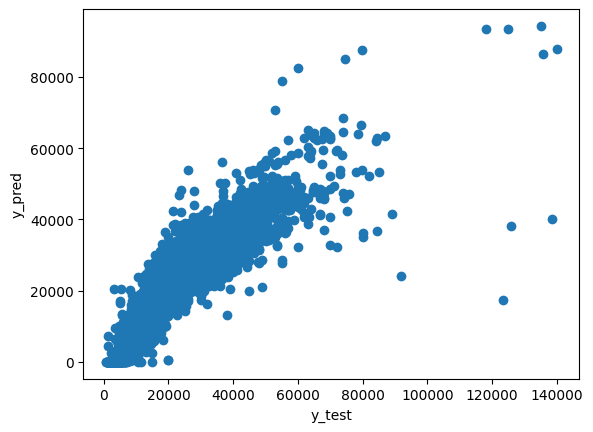

In [39]:
plt.scatter(y_test, y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [40]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [41]:
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

MAE: 2436.34
MSE: 14874589.26
RMSE: 3856.76


In [34]:
y_test.min(), y_test.max()

(675, 139948)

In [35]:
y_pred.min(), y_pred.max()

(-48191.76513438253, 94335.99078808771)

## Train Random Forest Regressor (skipping manual bootstraping)

## Can we get a better model by dealing with outliers?

In [46]:
def train_and_predict(X, y):

  # split training dataset
  print("Starting split dataset")
  X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

  # train model
  print("Starting to train the model")
  model = RandomForestRegressor(n_estimators=100)
  model.fit(X_train, y_train)

  # evaluate model
  print("Starting to predict")
  y_pred = model.predict(X_test)

  # get metrics
  print("Starting to evaluate")
  mse = mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  print(f"MAE: {mae:.2f}")
  print(f"MSE: {mse:.2f}")
  print(f"RMSE: {rmse:.2f}")

  # plot scatter
  print("Starting to plot")
  plt.scatter(y_test, y_pred)
  plt.xlabel('y_test')
  plt.ylabel('y_pred')
  plt.show()
  return

Starting split dataset
Starting to train the model
Starting to predict
Starting to evaluate
MAE: 1127.83
MSE: 4100122.97
RMSE: 2024.88
Starting to plot


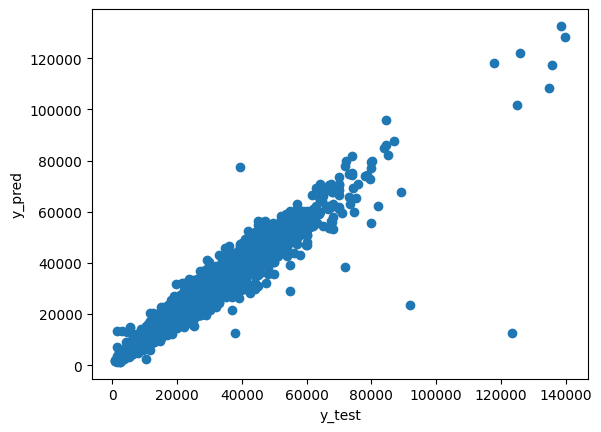

In [47]:
train_and_predict(X, y)

In [48]:
# Remove outliers using mpg
# looking at the min and max values, it's safe to assume that anything that
# gets below 10 mpg is a false value, since even bugatti chiron gets 10mpg.
# That means there are some outliers in mpg column since the min value is 0.3.
# The max value of 470.8 also does not make sense since even the most
# efficient electric cars don't get more than 130 mpg equivalent. Other variables
# don't seem to have any obvious outliers.
min_threshold = 10
max_threshold = 150
cars_df_fixed_mpg_removal = cars_df_fixed[(cars_df_fixed['mpg'] < max_threshold)]
cars_df_fixed_mpg_removal = cars_df_fixed[(cars_df_fixed['mpg'] > min_threshold)]
cars_df_fixed.describe()

,year,price,mileage,tax,mpg,engineSize,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,model_mean_price,manufacturer_mean_price
count,97406.000000,97406.000000,97406.000000,97406.000000,97406.000000,97406.000000,97406.000000,97406.000000,97406.000000,97406.000000,97406.000000,97406.000000,97406.000000,97406.000000,97406.000000,97406.000000,97406.000000
mean,2017.064041,16743.693171,23224.923506,120.189978,54.745784,1.665427,0.202606,0.569739,0.000092,0.227563,0.414831,0.000021,0.028664,0.002320,0.554165,16763.360768,16766.128400
std,2.119732,9852.900490,21054.853720,63.343762,12.141593,0.558040,0.401943,0.495115,0.009612,0.419261,0.492695,0.004531,0.166860,0.048113,0.497060,7763.144967,5268.502755
min,1970.000000,450.000000,1.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1295.000000,10314.259541
25%,2016.000000,9999.000000,7691.000000,125.000000,47.100000,1.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10548.840340,12269.779238
50%,2017.000000,14400.000000,17693.000000,145.000000,54.300000,1.600000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15817.342205,16807.898073
75%,2019.000000,20692.000000,32500.000000,145.000000,62.800000,2.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,20972.675472,22692.888691
max,2024.000000,159999.000000,323000.000000,580.000000,148.700000,6.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,98934.200000,24636.426361


Starting split dataset
Starting to train the model
Starting to predict
Starting to evaluate
MAE: 1132.88
MSE: 4058764.93
RMSE: 2014.64
Starting to plot


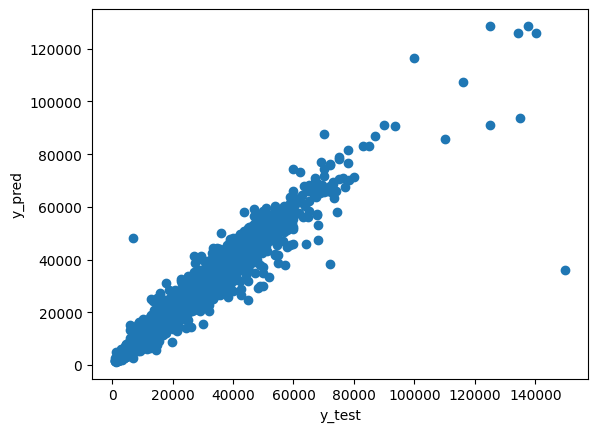

In [49]:
# outlier mpg experiment
X = cars_df_fixed_mpg_removal.drop(['price', 'model', 'Manufacturer'], axis=1)
y = cars_df_fixed_mpg_removal['price']
train_and_predict(X, y)

In [52]:
# oversampling
electric_cars = cars_df_fixed[cars_df_fixed['fuelType_Electric'] == 1]
electric_cars.head()

,model,year,price,mileage,tax,mpg,engineSize,Manufacturer,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,model_mean_price,manufacturer_mean_price
42264,Mondeo,2016,15975,9396,0,67.3,2.0,ford,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,12258.947266,12269.779238
50120,Mondeo,2016,15500,24531,0,67.3,2.0,ford,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,12258.947266,12269.779238


In [75]:
synthetic_samples = []
for n in range(5000):
    tmp_electric_car = electric_cars.copy()
    tmp_electric_car['mileage'] = tmp_electric_car['mileage'] - random.randint(-10, 1000)
    tmp_electric_car['mpg'] = tmp_electric_car['mpg'] - random.randint(-10, 10)
    synthetic_samples.append(tmp_electric_car.reset_index(drop=True))
synthetic_samples_df = pd.concat(synthetic_samples, axis=0)
synthetic_samples_df.head(10)

,model,year,price,mileage,tax,mpg,engineSize,Manufacturer,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,model_mean_price,manufacturer_mean_price
0,Mondeo,2016,15975,8569,0,76.3,2.0,ford,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,12258.947266,12269.779238
1,Mondeo,2016,15500,23704,0,76.3,2.0,ford,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,12258.947266,12269.779238
0,Mondeo,2016,15975,8768,0,67.3,2.0,ford,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,12258.947266,12269.779238
1,Mondeo,2016,15500,23903,0,67.3,2.0,ford,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,12258.947266,12269.779238
0,Mondeo,2016,15975,9052,0,67.3,2.0,ford,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,12258.947266,12269.779238
1,Mondeo,2016,15500,24187,0,67.3,2.0,ford,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,12258.947266,12269.779238
0,Mondeo,2016,15975,9054,0,66.3,2.0,ford,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,12258.947266,12269.779238
1,Mondeo,2016,15500,24189,0,66.3,2.0,ford,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,12258.947266,12269.779238
0,Mondeo,2016,15975,9105,0,74.3,2.0,ford,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,12258.947266,12269.779238
1,Mondeo,2016,15500,24240,0,74.3,2.0,ford,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,12258.947266,12269.779238


In [ ]:
cars_df_fixed.shape

In [77]:
cars_df_fixed_oversampled = pd.concat([synthetic_samples_df, cars_df_fixed], axis=0).reset_index(drop=True)
cars_df_fixed_oversampled.shape

(107406, 19)

Starting split dataset
Starting to train the model
Starting to predict
Starting to evaluate
MAE: 1034.42
MSE: 3930818.38
RMSE: 1982.63
Starting to plot


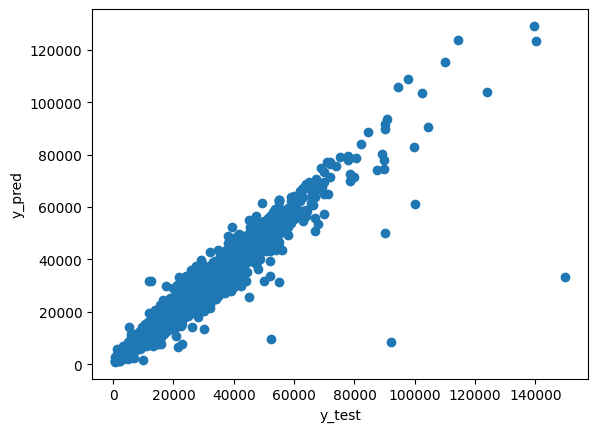

In [78]:
# oversample experiment
X = cars_df_fixed_oversampled.drop(['price', 'model', 'Manufacturer'], axis=1)
y = cars_df_fixed_oversampled['price']
train_and_predict(X, y)